# TMDB Movie Box Office Revenue Prediction Using Keras

I'll use pre-trained word embeddings in a Keras model for predicting the TMDB movie box office revenue.
Dataset from [Kaggle](https://www.kaggle.com/c/tmdb-box-office-prediction/data). 

- Categorize columns for data preprocessing in different type of features (binary, text, numerical, dictionary)
- Build model

Let's start.

In [267]:
import pandas as pd
import keras
import datetime
import numpy as np
import ast
import sklearn
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

In [268]:
train_data = pd.read_csv("data/train.csv")
train_data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## categorize columns

In [269]:
col_text = ['original_title', 'tagline', 'overview']

col_numeric = ['budget', 'popularity', 'runtime']
col_dicts = ['production_countries', 'production_companies', 'belongs_to_collection', 'genres', 'spoken_languages',
             'Keywords', 'cast', 'crew']

col_unwanted = ['poster_path', 'status', 'homepage', 'original_language']

#col_binary = ['status', 'original_language', 'homepage']
#status, original_language, homepage

## functions

In [270]:
#process variables convert to binary 

def process_binary(df):
    
    #process status
    df['isMovieReleased'] = 1
    df.loc[df['status'] != "Released" ,"isMovieReleased"] = 0
    #df['isMovieReleased']= pd.to_numeric(df['isMovieReleased'])
    
    #process original language - EN as 1, non-EN as 0
    df['isOriginalLanguageEng'] = 0 
    df.loc[df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    #df['original_language'] = pd.to_numeric(df['original_language'])
    
    #convert homepage to 0 or 1, 0 means the movie doesn't have a homepage, otherwise 1.
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0
    #df["homepage"] = pd.to_numeric(df["homepage"])
    
#def process_all_binary_col(df):
   # for col in col_binary:
        #df[col] 

In [271]:
#power_six = train_data.id[train_data.budget > 1000][train_data.revenue < 100]

#for k in power_six :
    #train_data.loc[train_data['id'] == k,'revenue'] =  train_data.loc[train_data['id'] == k,'revenue'] * 1000000
train_data.loc[train_data['id'] == 16,'revenue'] = 192864          # Skinning
train_data.loc[train_data['id'] == 90,'budget'] = 30000000         # Sommersby          
train_data.loc[train_data['id'] == 118,'budget'] = 60000000        # Wild Hogs
train_data.loc[train_data['id'] == 149,'budget'] = 18000000        # Beethoven
train_data.loc[train_data['id'] == 313,'revenue'] = 12000000       # The Cookout 
train_data.loc[train_data['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train_data.loc[train_data['id'] == 464,'budget'] = 20000000        # Parenthood
train_data.loc[train_data['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train_data.loc[train_data['id'] == 513,'budget'] = 930000          # From Prada to Nada
train_data.loc[train_data['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train_data.loc[train_data['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train_data.loc[train_data['id'] == 850,'budget'] = 90000000        # Modern Times
train_data.loc[train_data['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train_data.loc[train_data['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train_data.loc[train_data['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train_data.loc[train_data['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train_data.loc[train_data['id'] == 1542,'budget'] = 1              # All at Once
train_data.loc[train_data['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train_data.loc[train_data['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train_data.loc[train_data['id'] == 1714,'budget'] = 46000000       # The Recruit
train_data.loc[train_data['id'] == 1721,'budget'] = 17500000       # Cocoon
train_data.loc[train_data['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train_data.loc[train_data['id'] == 1885,'budget'] = 12             # In the Cut
train_data.loc[train_data['id'] == 2091,'budget'] = 10             # Deadfall
train_data.loc[train_data['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train_data.loc[train_data['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train_data.loc[train_data['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train_data.loc[train_data['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train_data.loc[train_data['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train_data.loc[train_data['id'] == 2801,'budget'] = 10000000       # Fracture
train_data.loc[train_data['id'] == 335,'budget'] = 2 
train_data.loc[train_data['id'] == 348,'budget'] = 12
train_data.loc[train_data['id'] == 470,'budget'] = 13000000 
train_data.loc[train_data['id'] == 513,'budget'] = 1100000
train_data.loc[train_data['id'] == 640,'budget'] = 6 
train_data.loc[train_data['id'] == 696,'budget'] = 1
train_data.loc[train_data['id'] == 797,'budget'] = 8000000 
train_data.loc[train_data['id'] == 850,'budget'] = 1500000
train_data.loc[train_data['id'] == 1199,'budget'] = 5 
train_data.loc[train_data['id'] == 1282,'budget'] = 9               # Death at a Funeral
train_data.loc[train_data['id'] == 1347,'budget'] = 1
train_data.loc[train_data['id'] == 1755,'budget'] = 2
train_data.loc[train_data['id'] == 1801,'budget'] = 5
train_data.loc[train_data['id'] == 1918,'budget'] = 592 
train_data.loc[train_data['id'] == 2033,'budget'] = 4
train_data.loc[train_data['id'] == 2118,'budget'] = 344 
train_data.loc[train_data['id'] == 2252,'budget'] = 130
train_data.loc[train_data['id'] == 2256,'budget'] = 1 
train_data.loc[train_data['id'] == 2696,'budget'] = 10000000

In [272]:
# code age
def process_age(df):
    df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
    df['age'] = df['release_date'].map(lambda x: (datetime.datetime.utcnow() - x)/ np.timedelta64(1, 'D'))

col_numeric.append('age')

In [273]:
def process_dict(value:'str'):
    names = []
    try:
        list_of_dict = ast.literal_eval(value)
        if len(list_of_dict) > 0:
            names = [x['name'] for x in list_of_dict]
    except:
        pass
    return ' '.join(names)

def process_all_dict_col(df):
    for col in col_dicts:
        df[col] = df[col].map(process_dict)

def process_all_numeric_col(df):
    for col in col_numeric:
        df[col] = np.log(df[col]+1)        

In [274]:
train_data.drop(axis=1, columns=col_unwanted)
process_binary(train_data)
process_age(train_data)        
process_all_dict_col(train_data)
process_all_numeric_col(train_data)
col_numeric.append('isMovieReleased')
col_numeric.append('isOriginalLanguageEng')
col_numeric.append('has_homepage')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


In [275]:
col_numeric

['budget',
 'popularity',
 'runtime',
 'age',
 'isMovieReleased',
 'isOriginalLanguageEng',
 'has_homepage']

In [276]:
X_train_text = train_data[col_text + col_dicts].apply(lambda row: '  '.join(row.values.astype(str)), axis=1)
X_train_num = train_data[col_numeric].as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [277]:
X_train_num = np.nan_to_num(X_train_num)

In [278]:
X_train_num.shape

(3000, 7)

In [279]:
y_train = np.array(train_data['revenue'])

In [280]:
y_train_l = np.log(y_train+1) 

In [281]:
import pandas as pd
import keras
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Conv1D, MaxPooling1D, Embedding
from keras.datasets import imdb
from keras.layers import Dense, Input, GlobalMaxPooling1D
import pickle
from keras import backend as K

In [338]:
max_features = 10000
embedding_dims = 300
nb_epoch = 10
batch_size = 120
maxlen = 300

In [283]:
# Train and save a tokenizer
a_tokenizer = text.Tokenizer(num_words = max_features)
a_tokenizer.fit_on_texts(X_train_text)
pickle.dump(a_tokenizer, file=open("model/tokenizer.mod", "bw"))

In [161]:
# # Use pre-trained Glove embeddings
# embeddings_index = dict()
# f = open('data/word_embedding/glove.840B.300d.txt', errors = 'ignore', encoding='utf8')
# for line in f:
#     values = line.split()
#     word = ''.join(values[:-300])
#     coefs = np.asarray(values[-300:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# embedding_matrix = np.zeros((max_features, embedding_dims))
# for word, index in a_tokenizer.word_index.items():
#     if index > max_features - 1:
#         break
#     else:
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[index] = embedding_vector

In [234]:
# np.save(open("model/embedding.np", "wb"), embedding_matrix)

In [284]:
embedding_matrix = np.load(open("model/embedding.np", "rb"))

In [285]:
X_train_text_proccessed = a_tokenizer.texts_to_sequences(X_train_text)
X_train_text_proccessed = sequence.pad_sequences(X_train_text_proccessed, maxlen=maxlen)

In [286]:
all_index = X_train_text.index.tolist()
split = train_test_split(all_index, train_size = 0.8, random_state=1)
train_index = split[0]
test_index = split[1]

In [339]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def create_model_merge_model():
    '''
    New API
    '''
    word_input_layer = Input(shape=(None, ), dtype='int32')
    word_output_layer = Embedding(
        input_dim=max_features,
        output_dim=embedding_dims,
        weights=[embedding_matrix],
        trainable=True)(word_input_layer)
    #pool_layer1 = GlobalAveragePooling1D()(word_output_layer)
    
    cov_1 = Conv1D(
    filters=500,
    kernel_size=3,
    padding='valid',
    activation='relu',
    strides=1)(word_output_layer)

    pool_layer1 = GlobalMaxPooling1D()(cov_1)
    txt_dense1 = Dense(16)(pool_layer1)
    txt_dense2 = Dense(8)(txt_dense1)

    num_input = Input(shape = (len(col_numeric), ), name = 'num_input')
    num_dense1 = Dense(2, input_dim=len(col_numeric), kernel_initializer='normal', activation='relu')(num_input)

    added = keras.layers.concatenate([txt_dense2, num_dense1])  # equivalent to added = keras.layers.add([x1, x2])

    main_output =  Dense(1, activation='linear', name='main_output')(added)
    model = keras.Model(inputs=[word_input_layer, num_input], outputs=main_output)

    model.compile(loss=root_mean_squared_error,
                      optimizer='sgd',
                      metrics=[root_mean_squared_error])
    return model



In [340]:
model = create_model_merge_model()

In [341]:
history = model.fit([X_train_text_proccessed[train_index],
           X_train_num[train_index]], 
          y_train_l[train_index],
          batch_size=batch_size, epochs=nb_epoch, verbose = True, validation_data=([X_train_text_proccessed[test_index], 
                                            X_train_num[test_index]], y_train_l[test_index]))

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 31s 13ms/step - loss: 6.1959 - root_mean_squared_error: 6.1959 - val_loss: 5.2057 - val_root_mean_squared_error: 5.2057
Epoch 2/10
2400/2400 [==============================] - 31s 13ms/step - loss: 4.3456 - root_mean_squared_error: 4.3456 - val_loss: 3.4268 - val_root_mean_squared_error: 3.4268
Epoch 3/10
2400/2400 [==============================] - 31s 13ms/step - loss: 4.1379 - root_mean_squared_error: 4.1379 - val_loss: 2.6389 - val_root_mean_squared_error: 2.6389
Epoch 4/10
2400/2400 [==============================] - 30s 13ms/step - loss: 3.8874 - root_mean_squared_error: 3.8874 - val_loss: 2.7949 - val_root_mean_squared_error: 2.7949
Epoch 5/10
2400/2400 [==============================] - 30s 13ms/step - loss: 3.7480 - root_mean_squared_error: 3.7480 - val_loss: 2.6219 - val_root_mean_squared_error: 2.6219
Epoch 6/10
2400/2400 [==============================] - 30s 12ms/step - l

In [316]:
from keras.utils import plot_model

In [326]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

plot_model(model, to_file='model.png',rankdir='TB',show_layer_names=False)

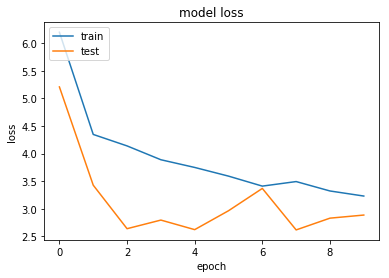

In [342]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Apply model to submission data

In [343]:
model = create_model_merge_model()

model.fit([X_train_text_proccessed,
           X_train_num], 
          y_train_l,
          batch_size=batch_size, epochs=3, verbose = True)

Epoch 1/3
3000/3000 [==============================] - 39s 13ms/step - loss: 5.4219 - root_mean_squared_error: 5.4219
Epoch 2/3
3000/3000 [==============================] - 42s 14ms/step - loss: 4.2169 - root_mean_squared_error: 4.2169
Epoch 3/3
3000/3000 [==============================] - 42s 14ms/step - loss: 3.8099 - root_mean_squared_error: 3.8099


In [291]:
submission = pd.read_csv("data/test.csv")

In [292]:
submission.loc[submission['id'] == 6733,'budget'] = 5000000
submission.loc[submission['id'] == 3889,'budget'] = 15000000
submission.loc[submission['id'] == 6683,'budget'] = 50000000
submission.loc[submission['id'] == 5704,'budget'] = 4300000
submission.loc[submission['id'] == 6109,'budget'] = 281756
submission.loc[submission['id'] == 7242,'budget'] = 10000000
submission.loc[submission['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
submission.loc[submission['id'] == 5591,'budget'] = 4000000        # The Orphanage
submission.loc[submission['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
submission.loc[submission['id'] == 3033,'budget'] = 250 
submission.loc[submission['id'] == 3051,'budget'] = 50
submission.loc[submission['id'] == 3084,'budget'] = 337
submission.loc[submission['id'] == 3224,'budget'] = 4  
submission.loc[submission['id'] == 3594,'budget'] = 25  
submission.loc[submission['id'] == 3619,'budget'] = 500  
submission.loc[submission['id'] == 3831,'budget'] = 3  
submission.loc[submission['id'] == 3935,'budget'] = 500  
submission.loc[submission['id'] == 4049,'budget'] = 995946 
submission.loc[submission['id'] == 4424,'budget'] = 3  
submission.loc[submission['id'] == 4460,'budget'] = 8  
submission.loc[submission['id'] == 4555,'budget'] = 1200000 
submission.loc[submission['id'] == 4624,'budget'] = 30 
submission.loc[submission['id'] == 4645,'budget'] = 500 
submission.loc[submission['id'] == 4709,'budget'] = 450 
submission.loc[submission['id'] == 4839,'budget'] = 7
submission.loc[submission['id'] == 3125,'budget'] = 25 
submission.loc[submission['id'] == 3142,'budget'] = 1
submission.loc[submission['id'] == 3201,'budget'] = 450
submission.loc[submission['id'] == 3222,'budget'] = 6
submission.loc[submission['id'] == 3545,'budget'] = 38
submission.loc[submission['id'] == 3670,'budget'] = 18
submission.loc[submission['id'] == 3792,'budget'] = 19
submission.loc[submission['id'] == 3881,'budget'] = 7
submission.loc[submission['id'] == 3969,'budget'] = 400
submission.loc[submission['id'] == 4196,'budget'] = 6
submission.loc[submission['id'] == 4221,'budget'] = 11
submission.loc[submission['id'] == 4222,'budget'] = 500
submission.loc[submission['id'] == 4285,'budget'] = 11
submission.loc[submission['id'] == 4319,'budget'] = 1
submission.loc[submission['id'] == 4639,'budget'] = 10
submission.loc[submission['id'] == 4719,'budget'] = 45
submission.loc[submission['id'] == 4822,'budget'] = 22
submission.loc[submission['id'] == 4829,'budget'] = 20
submission.loc[submission['id'] == 4969,'budget'] = 20
submission.loc[submission['id'] == 5021,'budget'] = 40 
submission.loc[submission['id'] == 5035,'budget'] = 1 
submission.loc[submission['id'] == 5063,'budget'] = 14 
submission.loc[submission['id'] == 5119,'budget'] = 2 
submission.loc[submission['id'] == 5214,'budget'] = 30 
submission.loc[submission['id'] == 5221,'budget'] = 50 
submission.loc[submission['id'] == 4903,'budget'] = 15
submission.loc[submission['id'] == 4983,'budget'] = 3
submission.loc[submission['id'] == 5102,'budget'] = 28
submission.loc[submission['id'] == 5217,'budget'] = 75
submission.loc[submission['id'] == 5224,'budget'] = 3 
submission.loc[submission['id'] == 5469,'budget'] = 20 
submission.loc[submission['id'] == 5840,'budget'] = 1 
submission.loc[submission['id'] == 5960,'budget'] = 30
submission.loc[submission['id'] == 6506,'budget'] = 11 
submission.loc[submission['id'] == 6553,'budget'] = 280
submission.loc[submission['id'] == 6561,'budget'] = 7
submission.loc[submission['id'] == 6582,'budget'] = 218
submission.loc[submission['id'] == 6638,'budget'] = 5
submission.loc[submission['id'] == 6749,'budget'] = 8 
submission.loc[submission['id'] == 6759,'budget'] = 50 
submission.loc[submission['id'] == 6856,'budget'] = 10
submission.loc[submission['id'] == 6858,'budget'] =  100
submission.loc[submission['id'] == 6876,'budget'] =  250
submission.loc[submission['id'] == 6972,'budget'] = 1
submission.loc[submission['id'] == 7079,'budget'] = 8000000
submission.loc[submission['id'] == 7150,'budget'] = 118
submission.loc[submission['id'] == 6506,'budget'] = 118
submission.loc[submission['id'] == 7225,'budget'] = 6
submission.loc[submission['id'] == 7231,'budget'] = 85
submission.loc[submission['id'] == 5222,'budget'] = 5
submission.loc[submission['id'] == 5322,'budget'] = 90
submission.loc[submission['id'] == 5350,'budget'] = 70
submission.loc[submission['id'] == 5378,'budget'] = 10
submission.loc[submission['id'] == 5545,'budget'] = 80
submission.loc[submission['id'] == 5810,'budget'] = 8
submission.loc[submission['id'] == 5926,'budget'] = 300
submission.loc[submission['id'] == 5927,'budget'] = 4
submission.loc[submission['id'] == 5986,'budget'] = 1
submission.loc[submission['id'] == 6053,'budget'] = 20
submission.loc[submission['id'] == 6104,'budget'] = 1
submission.loc[submission['id'] == 6130,'budget'] = 30
submission.loc[submission['id'] == 6301,'budget'] = 150
submission.loc[submission['id'] == 6276,'budget'] = 100
submission.loc[submission['id'] == 6473,'budget'] = 100
submission.loc[submission['id'] == 6842,'budget'] = 30

In [293]:
submission.drop(axis=1, columns=col_unwanted)
process_age(submission)
process_binary(submission)
process_all_dict_col(submission)
process_all_numeric_col(submission)

#col_numeric.append('isMovieReleased')
#col_numeric.append('isOriginalLanguageEng')
#col_numeric.append('has_homepage')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


In [294]:
X_submission_text = submission[col_text + col_dicts].apply(lambda row: '  '.join(row.values.astype(str)), axis=1)
X_submission_num = submission[col_numeric].as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [295]:
X_submission_num = np.nan_to_num(X_submission_num)

In [296]:
X_submission_text_proccessed = a_tokenizer.texts_to_sequences(X_submission_text)
X_submission_text_proccessed = sequence.pad_sequences(X_submission_text_proccessed, maxlen=maxlen)

In [297]:
X_submission_text_proccessed.shape

(4398, 300)

In [298]:
X_submission_num.shape

(4398, 7)

In [299]:
y_submission = model.predict([X_submission_text_proccessed, X_submission_num])

In [300]:
y_submission

array([[10.56096  ],
       [10.9068365],
       [11.330333 ],
       ...,
       [11.9199915],
       [11.717591 ],
       [10.806519 ]], dtype=float32)

In [301]:
y_submission = np.exp(y_submission)

In [302]:
submission_df = pd.DataFrame({'id':submission['id'].values, 
                              'revenue': y_submission.transpose()[0].tolist()})

In [303]:
submission_df.to_csv("data/submission_6.csv", index=False)

In [304]:
submission_df.head()

,id,revenue
0,3001,38598.156250
1,3002,54548.011719
2,3003,83310.742188
3,3004,175964.281250
4,3005,59584.035156


In [265]:
!! kaggle competitions submit -c tmdb-box-office-prediction -f "data/submission_6.csv" -m "submission 6"

['',
 '  0%|          | 0.00/70.4k [00:00<?, ?B/s]',
 ' 11%|█▏        | 8.00k/70.4k [00:00<00:00, 80.9kB/s]',
 '100%|██████████| 70.4k/70.4k [00:01<00:00, 52.8kB/s]',
 'Successfully submitted to TMDB Box Office Prediction']